In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('data/data1analytical.csv')

# Read Category Mappings csv
category_mappings = pd.read_csv('data/Category Mapping.csv')
# Get the Category column from the category_mappings dataframe and merge to dataset2_encoded
data1 = pd.merge(data, category_mappings[['Subcategory', 'Category']], on='Subcategory', how='left')

In [3]:
data1

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area,Category
0,2022,June,4008,SWEET BAKERY SNACKS,24.0,24.40,MATYA,Kiosk,Μακεδονία και Θράκη,SNACKS
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,MATYA,Kiosk,Μακεδονία και Θράκη,TOBACCO COMPL
2,2022,August,5122,ΟΥΖΟ,3.0,11.00,MATYA,Kiosk,Δυτική και Κεντρική Ελλάδα,ALCOHOLIC BEVERAGES
3,2022,June,10254,CORN,51.0,74.00,MATYA,Kiosk,Μακεδονία και Θράκη,SNACKS
4,2022,October,10280,STICK,122.0,277.80,MATYA,Kiosk,Αττική,ICE CREAM
...,...,...,...,...,...,...,...,...,...,...
351094,2023,March,7986,WHISKY,1.0,23.00,MAT,Mini-Market,Μακεδονία και Θράκη,ALCOHOLIC BEVERAGES
351095,2023,January,6532,SANDWICH,29.0,48.50,MAT,Kiosk,Νησιά,BISCUITS
351096,2023,January,3545,ICE TEA,11.0,20.00,MAT,Mini-Market,Αττική,SOFT DRINKS
351097,2022,December,3813,COLAS,364.0,653.64,MAT,Kiosk,Πελοπόννησος,SOFT DRINKS


In [4]:
# Calculate price (Revenue/Quantity) for each product
data1['Price'] = data1['Revenue'] / data1['Quantity']
data1

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area,Category,Price
0,2022,June,4008,SWEET BAKERY SNACKS,24.0,24.40,MATYA,Kiosk,Μακεδονία και Θράκη,SNACKS,1.016667
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,MATYA,Kiosk,Μακεδονία και Θράκη,TOBACCO COMPL,0.666883
2,2022,August,5122,ΟΥΖΟ,3.0,11.00,MATYA,Kiosk,Δυτική και Κεντρική Ελλάδα,ALCOHOLIC BEVERAGES,3.666667
3,2022,June,10254,CORN,51.0,74.00,MATYA,Kiosk,Μακεδονία και Θράκη,SNACKS,1.450980
4,2022,October,10280,STICK,122.0,277.80,MATYA,Kiosk,Αττική,ICE CREAM,2.277049
...,...,...,...,...,...,...,...,...,...,...,...
351094,2023,March,7986,WHISKY,1.0,23.00,MAT,Mini-Market,Μακεδονία και Θράκη,ALCOHOLIC BEVERAGES,23.000000
351095,2023,January,6532,SANDWICH,29.0,48.50,MAT,Kiosk,Νησιά,BISCUITS,1.672414
351096,2023,January,3545,ICE TEA,11.0,20.00,MAT,Mini-Market,Αττική,SOFT DRINKS,1.818182
351097,2022,December,3813,COLAS,364.0,653.64,MAT,Kiosk,Πελοπόννησος,SOFT DRINKS,1.795714


In [5]:
# Group by StoreId, Category and calculate the average price
data1_grouped = data1.groupby(['StoreId', 'Category']).agg({'Price': 'mean'}).reset_index()
data1_grouped


,StoreId,Category,Price
0,3435,ALCOHOLIC BEVERAGES,3.470383
1,3435,BISCUITS,1.914825
2,3435,CHOCOLATE,1.208003
3,3435,COFFEE,1.486962
4,3435,DAIRY,1.536078
...,...,...,...
3344,10963,SOFT DRINKS,1.339156
3345,10963,TICKETING AND ADMISSION SERVICES,12.609595
3346,10963,TOBACCO,4.735000
3347,10963,TOBACCO COMPL,5.364182


In [6]:
# Pivot the data1_grouped dataframe
data1_pivot = data1_grouped.pivot(columns='Category', index='StoreId', values='Price')
# Fill NaNs with the average price for each category
data1_pivot = data1_pivot.fillna(data1_pivot.mean())
data1_pivot

Category,ALCOHOLIC BEVERAGES,BISCUITS,CHOCOLATE,COFFEE,DAIRY,GUMS & CANDIES,HOME & PERSONAL CARE,ICE CREAM,MILK,PACKAGED FOOD,PET CARE,PRINT,SNACKS,SOFT DRINKS,TICKETING AND ADMISSION SERVICES,TOBACCO,TOBACCO COMPL,TOYS
StoreId,,,,,,,,,,,,,,,,,,
3435,3.470383,1.914825,1.208003,1.486962,1.536078,0.898700,1.588678,3.389018,1.733993,1.943256,1.065002,3.910922,1.418956,1.245465,14.736045,5.891249,10.016374,1.705755
3439,9.141535,1.882501,1.228549,1.284929,1.830063,0.798500,2.089121,3.788234,2.060565,2.588497,1.293965,3.367313,1.489890,1.361490,16.912949,5.893667,13.749944,2.183153
3484,2.064949,1.775431,1.139830,1.270534,2.450265,0.852711,1.465896,3.163403,2.104242,2.444061,1.561944,3.436929,1.319170,1.219009,16.157533,4.690231,5.731688,2.704545
3493,9.231740,1.933585,1.206842,2.172899,2.237394,1.156505,1.674337,3.529221,2.038474,2.472950,1.246037,1.006043,1.487343,1.335024,7.190363,4.837268,6.437890,1.789471
3521,4.049897,2.056706,1.297419,1.722533,1.823618,1.255403,1.737125,3.206563,1.656821,2.276981,1.561944,3.367313,1.384882,1.369818,14.926262,5.041051,0.739705,1.393636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,10.839360,1.849414,1.483641,4.215388,2.345838,1.011315,2.544034,3.482408,1.844392,2.254305,1.428394,2.887416,1.451801,1.278314,10.200531,6.008421,16.697911,1.148856
10884,3.013471,2.072286,1.305166,1.323659,1.533017,1.072148,1.622393,3.287024,2.003002,2.440610,1.239286,8.225000,1.577135,1.399605,19.035465,6.087118,10.894068,1.228902
10923,12.099238,1.950711,1.519720,3.952904,3.051917,1.202852,2.269755,3.338147,2.364278,2.726771,2.669831,3.367313,1.684127,1.411453,14.543019,5.316389,19.804796,1.819147


In [7]:
from sklearn.compose import ColumnTransformer
# Scale the data
from sklearn.preprocessing import StandardScaler

# Get all the column names
columns = data1_pivot.columns

# Create a StandardScaler instance
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns)
    ])

In [8]:
# Apply the transformations
data_preprocessed = preprocessor.fit_transform(data1_pivot)
data_preprocessed

array([[-0.99915617,  0.19930215, -0.35712053, ...,  1.13283299,
         0.08862074, -0.40378852],
       [ 0.63795503,  0.01335642, -0.2087179 , ...,  1.13695384,
         0.76704517,  0.11600447],
       [-1.4048678 , -0.60255261, -0.84953559, ..., -0.91391435,
        -0.68994663,  0.68369905],
       ...,
       [ 1.49176521,  0.4057332 ,  1.89442285, ...,  0.15317028,
         1.8672683 , -0.28032707],
       [-0.40572114, -0.08837558,  0.19716858, ..., -0.76230234,
         2.3621286 , -0.01823611],
       [-0.67169115,  1.00868284,  0.18120677, ..., -0.83762002,
        -0.7567259 , -0.7281008 ]])

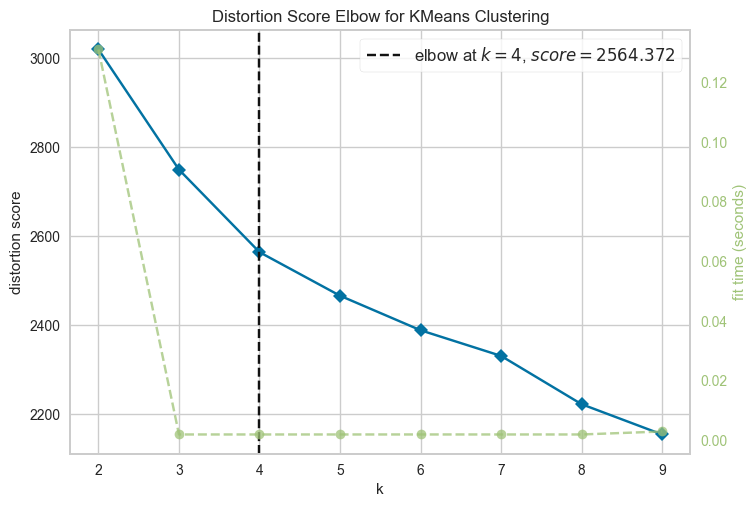

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Perform the elbow method to find the optimal number of clusters
model = KMeans(n_init='auto', max_iter=1000, random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data_preprocessed)
visualizer.show()

In [10]:
# Sort the silhouette scores for k = 2 to 5
from sklearn.metrics import silhouette_score

scores = []

for i in range(2, 6):
    model = KMeans(n_clusters=i, n_init='auto', max_iter=1000, random_state=42)
    model.fit(data_preprocessed)
    score = silhouette_score(data_preprocessed, model.labels_)
    scores.append({'k': i, 'score': score})

scores.sort(key=lambda x: x['score'], reverse=True)
scores

[{'k': 2, 'score': 0.14306578946062218},
 {'k': 5, 'score': 0.10292652114553683},
 {'k': 4, 'score': 0.1018323472741967},
 {'k': 3, 'score': 0.09926972007829699}]

In [11]:
# Choosing an appropriate number of clusters (k)
k = 3  # Adjust the number of clusters as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', max_iter=1000)
kmeans.fit(data_preprocessed)

# Assigning the clusters to each row in the dataframe
data1_pivot['cluster'] = kmeans.labels_
data1_pivot

Category,ALCOHOLIC BEVERAGES,BISCUITS,CHOCOLATE,COFFEE,DAIRY,GUMS & CANDIES,HOME & PERSONAL CARE,ICE CREAM,MILK,PACKAGED FOOD,PET CARE,PRINT,SNACKS,SOFT DRINKS,TICKETING AND ADMISSION SERVICES,TOBACCO,TOBACCO COMPL,TOYS,cluster
StoreId,,,,,,,,,,,,,,,,,,,
3435,3.470383,1.914825,1.208003,1.486962,1.536078,0.898700,1.588678,3.389018,1.733993,1.943256,1.065002,3.910922,1.418956,1.245465,14.736045,5.891249,10.016374,1.705755,2
3439,9.141535,1.882501,1.228549,1.284929,1.830063,0.798500,2.089121,3.788234,2.060565,2.588497,1.293965,3.367313,1.489890,1.361490,16.912949,5.893667,13.749944,2.183153,2
3484,2.064949,1.775431,1.139830,1.270534,2.450265,0.852711,1.465896,3.163403,2.104242,2.444061,1.561944,3.436929,1.319170,1.219009,16.157533,4.690231,5.731688,2.704545,1
3493,9.231740,1.933585,1.206842,2.172899,2.237394,1.156505,1.674337,3.529221,2.038474,2.472950,1.246037,1.006043,1.487343,1.335024,7.190363,4.837268,6.437890,1.789471,2
3521,4.049897,2.056706,1.297419,1.722533,1.823618,1.255403,1.737125,3.206563,1.656821,2.276981,1.561944,3.367313,1.384882,1.369818,14.926262,5.041051,0.739705,1.393636,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,10.839360,1.849414,1.483641,4.215388,2.345838,1.011315,2.544034,3.482408,1.844392,2.254305,1.428394,2.887416,1.451801,1.278314,10.200531,6.008421,16.697911,1.148856,2
10884,3.013471,2.072286,1.305166,1.323659,1.533017,1.072148,1.622393,3.287024,2.003002,2.440610,1.239286,8.225000,1.577135,1.399605,19.035465,6.087118,10.894068,1.228902,2
10923,12.099238,1.950711,1.519720,3.952904,3.051917,1.202852,2.269755,3.338147,2.364278,2.726771,2.669831,3.367313,1.684127,1.411453,14.543019,5.316389,19.804796,1.819147,0


In [12]:
# Code to analyze the characteristics of each cluster
# Grouping the data by cluster and calculating mean values for each subcategory
cluster_analysis = data1_pivot.groupby('cluster').mean()

# Transposing the cluster analysis for better readability
cluster_analysis = cluster_analysis.transpose()
cluster_analysis

cluster,0,1,2
Category,,,
ALCOHOLIC BEVERAGES,9.520202,4.613509,7.090709
BISCUITS,2.034278,1.714036,1.905415
CHOCOLATE,1.394289,1.164367,1.249357
COFFEE,3.517739,1.943872,2.463229
DAIRY,3.002298,2.222481,2.334929
GUMS & CANDIES,1.138327,0.932492,1.017856
HOME & PERSONAL CARE,2.488499,1.682506,1.993604
ICE CREAM,3.377782,2.801378,3.289340
MILK,2.249819,1.808224,2.036871


In [13]:

# Make the index a column
data1_pivot.reset_index(inplace=True)

In [14]:
data1_pivot


Category,StoreId,ALCOHOLIC BEVERAGES,BISCUITS,CHOCOLATE,COFFEE,DAIRY,GUMS & CANDIES,HOME & PERSONAL CARE,ICE CREAM,MILK,PACKAGED FOOD,PET CARE,PRINT,SNACKS,SOFT DRINKS,TICKETING AND ADMISSION SERVICES,TOBACCO,TOBACCO COMPL,TOYS,cluster
0,3435,3.470383,1.914825,1.208003,1.486962,1.536078,0.898700,1.588678,3.389018,1.733993,1.943256,1.065002,3.910922,1.418956,1.245465,14.736045,5.891249,10.016374,1.705755,2
1,3439,9.141535,1.882501,1.228549,1.284929,1.830063,0.798500,2.089121,3.788234,2.060565,2.588497,1.293965,3.367313,1.489890,1.361490,16.912949,5.893667,13.749944,2.183153,2
2,3484,2.064949,1.775431,1.139830,1.270534,2.450265,0.852711,1.465896,3.163403,2.104242,2.444061,1.561944,3.436929,1.319170,1.219009,16.157533,4.690231,5.731688,2.704545,1
3,3493,9.231740,1.933585,1.206842,2.172899,2.237394,1.156505,1.674337,3.529221,2.038474,2.472950,1.246037,1.006043,1.487343,1.335024,7.190363,4.837268,6.437890,1.789471,2
4,3521,4.049897,2.056706,1.297419,1.722533,1.823618,1.255403,1.737125,3.206563,1.656821,2.276981,1.561944,3.367313,1.384882,1.369818,14.926262,5.041051,0.739705,1.393636,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10821,10.839360,1.849414,1.483641,4.215388,2.345838,1.011315,2.544034,3.482408,1.844392,2.254305,1.428394,2.887416,1.451801,1.278314,10.200531,6.008421,16.697911,1.148856,2
196,10884,3.013471,2.072286,1.305166,1.323659,1.533017,1.072148,1.622393,3.287024,2.003002,2.440610,1.239286,8.225000,1.577135,1.399605,19.035465,6.087118,10.894068,1.228902,2
197,10923,12.099238,1.950711,1.519720,3.952904,3.051917,1.202852,2.269755,3.338147,2.364278,2.726771,2.669831,3.367313,1.684127,1.411453,14.543019,5.316389,19.804796,1.819147,0
198,10961,5.526114,1.864816,1.284742,3.139324,2.258838,1.231848,1.968284,3.125604,2.151728,1.997217,1.152290,2.381747,1.427463,1.290439,7.357535,4.779196,22.528158,2.059861,2


In [15]:
data_merge = data1_pivot[['StoreId', 'cluster']]
data_merge

Category,StoreId,cluster
0,3435,2
1,3439,2
2,3484,1
3,3493,2
4,3521,2
...,...,...
195,10821,2
196,10884,2
197,10923,0
198,10961,2


In [16]:

# Read the Store Mapping csv
store_mapping = pd.read_csv('data/Store Mapping.csv')
# Merge the data_merge dataframe with the data_merge dataframe
stores = pd.merge(store_mapping, data_merge, on='StoreId', how='left')

In [17]:
stores

,StoreId,StoreType,Area,cluster
0,3435,Kiosk,Αττική,2
1,3439,Kiosk,Κρήτη,2
2,3484,Kiosk,Μακεδονία και Θράκη,1
3,3493,Kiosk,Κρήτη,2
4,3521,Kiosk,Αττική,2
...,...,...,...,...
195,10812,Mini-Market,Δυτική και Κεντρική Ελλάδα,1
196,10821,Mini-Market,Δυτική και Κεντρική Ελλάδα,2
197,10923,Mini-Market,Αττική,0
198,10961,Mini-Market,Αττική,2


In [18]:
# Merge the data1analytical.csv with the stores dataframe on StoreId
#stores = stores[['StoreId', 'cluster']]
# Create a new column called Price Tier where
# Expensive = cluster 0
# Moderate = cluster 2
# Cheap = cluster 1
stores['Price Tier'] = stores['cluster'].map({0: 'Expensive', 1: 'Cheap', 2: 'Moderate'})

In [19]:
data2 = pd.merge(data, stores, on='StoreId', how='left')
data2

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area_x,StoreType,Area_y,cluster,Price Tier
0,2022,June,4008,SWEET BAKERY SNACKS,24.0,24.40,MATYA,Kiosk,Μακεδονία και Θράκη,Kiosk,Μακεδονία και Θράκη,2,Moderate
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,MATYA,Kiosk,Μακεδονία και Θράκη,Kiosk,Μακεδονία και Θράκη,2,Moderate
2,2022,August,5122,ΟΥΖΟ,3.0,11.00,MATYA,Kiosk,Δυτική και Κεντρική Ελλάδα,Kiosk,Δυτική και Κεντρική Ελλάδα,2,Moderate
3,2022,June,10254,CORN,51.0,74.00,MATYA,Kiosk,Μακεδονία και Θράκη,Kiosk,Μακεδονία και Θράκη,2,Moderate
4,2022,October,10280,STICK,122.0,277.80,MATYA,Kiosk,Αττική,Kiosk,Αττική,1,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351094,2023,March,7986,WHISKY,1.0,23.00,MAT,Mini-Market,Μακεδονία και Θράκη,Mini-Market,Μακεδονία και Θράκη,2,Moderate
351095,2023,January,6532,SANDWICH,29.0,48.50,MAT,Kiosk,Νησιά,Kiosk,Νησιά,0,Expensive
351096,2023,January,3545,ICE TEA,11.0,20.00,MAT,Mini-Market,Αττική,Mini-Market,Αττική,0,Expensive
351097,2022,December,3813,COLAS,364.0,653.64,MAT,Kiosk,Πελοπόννησος,Kiosk,Πελοπόννησος,1,Cheap


In [20]:
#data2.to_csv('data/data1analytical_with_avg_clust.csv', index=False)

In [21]:
# Group by cluster and Area and calculate the count for each Area
stores_grouped_area = stores.groupby(['cluster', 'Area']).agg({'StoreId': 'count'}).reset_index()
stores_grouped_area

,cluster,Area,StoreId
0,0,Αττική,24
1,0,Δυτική και Κεντρική Ελλάδα,1
2,0,Κρήτη,4
3,0,Μακεδονία και Θράκη,2
4,0,Νησιά,8
5,0,Πελοπόννησος,5
6,1,Αττική,7
7,1,Δυτική και Κεντρική Ελλάδα,12
8,1,Μακεδονία και Θράκη,26
9,1,Νησιά,3


Chi-Square Test of Independence

In [22]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.pivot_table(stores_grouped_area, values='StoreId', index='cluster', columns='Area', fill_value=0)

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 54.538354978354974
p-value: 3.851193492665751e-08


In [23]:
expected

array([[16.5,  4.4,  2.2, 13.2,  3.3,  4.4],
       [21. ,  5.6,  2.8, 16.8,  4.2,  5.6],
       [37.5, 10. ,  5. , 30. ,  7.5, 10. ]])

In [24]:
# Print the percentage changes between the observed and expected values
percentage_change = (contingency_table - expected) / expected * 100
percentage_change

Area,Αττική,Δυτική και Κεντρική Ελλάδα,Κρήτη,Μακεδονία και Θράκη,Νησιά,Πελοπόννησος
cluster,,,,,,
0,45.454545,-77.272727,81.818182,-84.848485,142.424242,13.636364
1,-66.666667,114.285714,-100.000000,54.761905,-28.571429,42.857143
2,17.333333,-30.000000,20.000000,6.666667,-46.666667,-30.000000


In [25]:
# Group by cluster and Area and calculate the count for each Area
stores_grouped_type = stores.groupby(['cluster', 'StoreType']).agg({'StoreId': 'count'}).reset_index()
stores_grouped_type

,cluster,StoreType,StoreId
0,0,Kiosk,8
1,0,Mini-Market,36
2,1,Kiosk,32
3,1,Mini-Market,24
4,2,Kiosk,49
5,2,Mini-Market,51


In [26]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.pivot_table(stores_grouped_type, values='StoreId', index='cluster', columns='StoreType', fill_value=0)

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 16.78412689648644
p-value: 0.00022665909617606937


In [37]:
expected

array([[19.58, 24.42],
       [24.92, 31.08],
       [44.5 , 55.5 ]])

In [27]:
# Print the percentage changes between the observed and expected values
percentage_change = (contingency_table - expected) / expected * 100
percentage_change

StoreType,Kiosk,Mini-Market
cluster,,
0,-59.141982,47.420147
1,28.410915,-22.779923
2,10.112360,-8.108108


## Perform TWO-WAY ANOVA for the Area and StoreType for the clusters

In [28]:
stores_grouped_both = stores.groupby(['cluster', 'Area', 'StoreType']).agg({'StoreId': 'count'}).reset_index()
stores_grouped_both

,cluster,Area,StoreType,StoreId
0,0,Αττική,Kiosk,1
1,0,Αττική,Mini-Market,23
2,0,Δυτική και Κεντρική Ελλάδα,Mini-Market,1
3,0,Κρήτη,Kiosk,1
4,0,Κρήτη,Mini-Market,3
5,0,Μακεδονία και Θράκη,Mini-Market,2
6,0,Νησιά,Kiosk,4
7,0,Νησιά,Mini-Market,4
8,0,Πελοπόννησος,Kiosk,2
9,0,Πελοπόννησος,Mini-Market,3


In [29]:
combined_df.fillna(0, inplace=True)

NameError: name 'combined_df' is not defined

In [ ]:
combined_df

In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming the dataframe is named df
# df = ...

# Perform two-way ANOVA with interaction
model = ols('StoreId ~ C(Area) + C(StoreType) + C(Area):C(StoreType) ', data=stores_grouped_both).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_results)


                          sum_sq    df         F    PR(>F)
C(Area)               614.974535   5.0  2.574013  0.059210
C(StoreType)            1.139241   1.0  0.023842  0.878836
C(Area):C(StoreType)   22.527426   5.0  0.094290  0.992127
Residual              955.666667  20.0       NaN       NaN
